In [9]:
# cancer_pipeline.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# loading dataset

cancer_prediciton = pd.read_csv('cancer prediction.csv')

In [11]:
cancer_prediciton.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [12]:
cancer_prediciton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [13]:
cancer_prediciton.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [14]:
# Creating Feature Engineering (BMI category, Age group)

def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obese'

In [15]:
# Applying Feature Engineering

cancer_prediciton['BMI_Category'] = cancer_prediciton['BMI'].apply(categorize_bmi)

cancer_prediciton['Age_Group'] = pd.cut(cancer_prediciton['Age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initializing label encoders
bmi_encoder = LabelEncoder()
age_group_encoder = LabelEncoder()

# Apply label encoding
cancer_prediciton['BMI_Category'] = bmi_encoder.fit_transform(cancer_prediciton['BMI_Category'])
cancer_prediciton['Age_Group'] = age_group_encoder.fit_transform(cancer_prediciton['Age_Group'])

In [17]:
cancer_prediciton.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,BMI_Category,Age_Group
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,3,0
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,1,1
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,1,0
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,1,2
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,1,1


In [18]:
# Defining features and target

X = cancer_prediciton.drop(columns=['Diagnosis'])

y = cancer_prediciton['Diagnosis']

In [19]:
cancer_prediciton.Diagnosis.value_counts()

,count
Diagnosis,
0,943
1,557


In [20]:
# Normalizing numerical features

scaler = StandardScaler()

X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']] = scaler.fit_transform(X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']])

In [21]:

# Performing Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
X_train.shape

(1518, 10)

In [24]:
# Training Logistic Regression model

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Training better models

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:13:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


Logistic Regression Evaluation:
Accuracy: 0.8733333333333333
F1 Score: 0.8467741935483871
ROC AUC Score: 0.937031484257871

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       184
           1       0.80      0.91      0.85       116

    accuracy                           0.87       300
   macro avg       0.86      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300



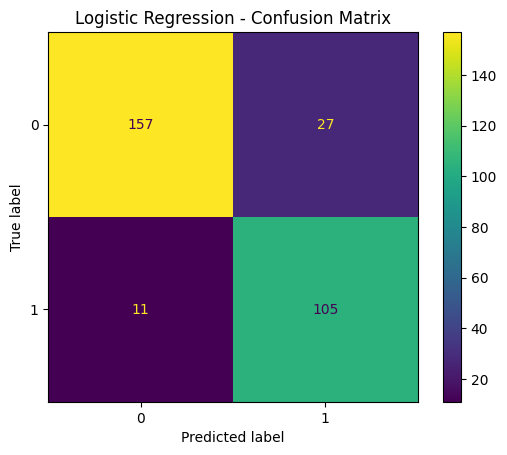

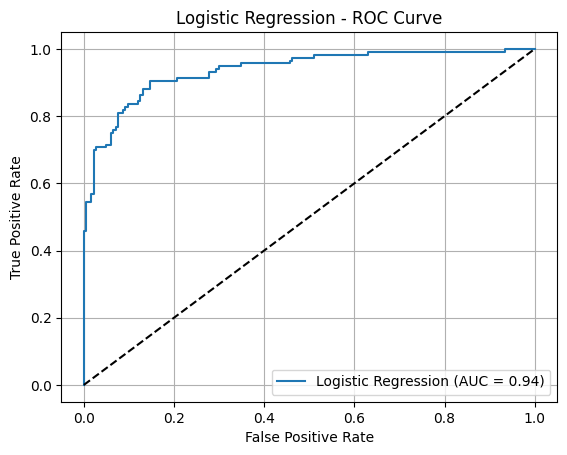


Random Forest Evaluation:
Accuracy: 0.9066666666666666
F1 Score: 0.8793103448275862
ROC AUC Score: 0.9384370314842578

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       184
           1       0.88      0.88      0.88       116

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



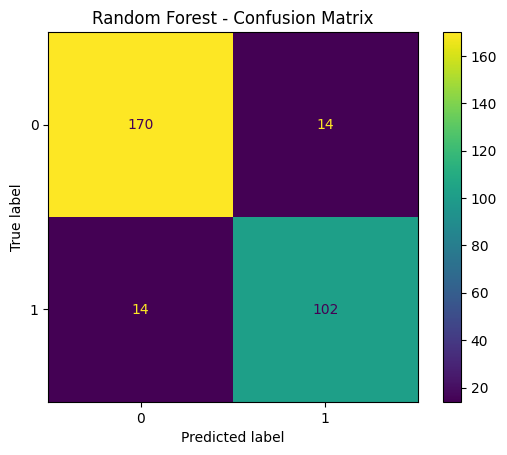

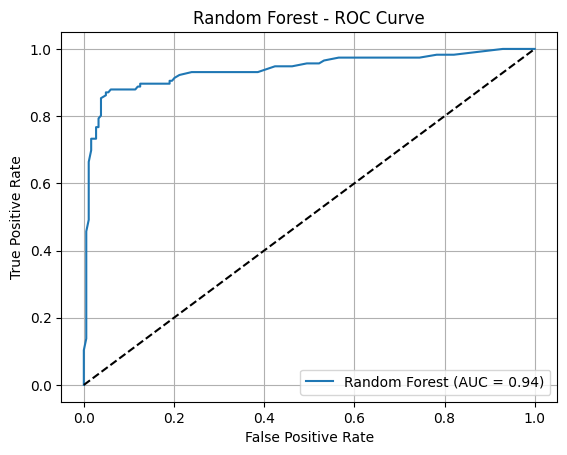


XGBoost Evaluation:
Accuracy: 0.8966666666666666
F1 Score: 0.8646288209606987
ROC AUC Score: 0.9395146176911544

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       184
           1       0.88      0.85      0.86       116

    accuracy                           0.90       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300



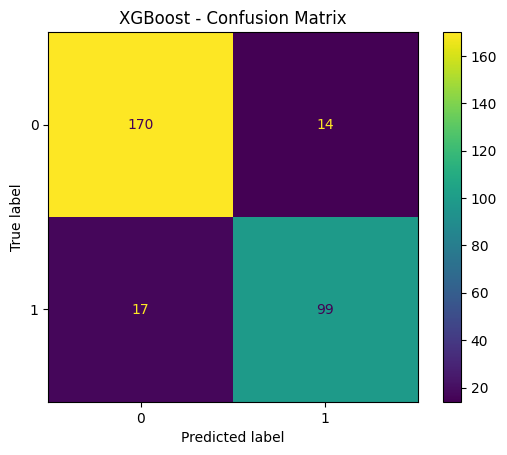

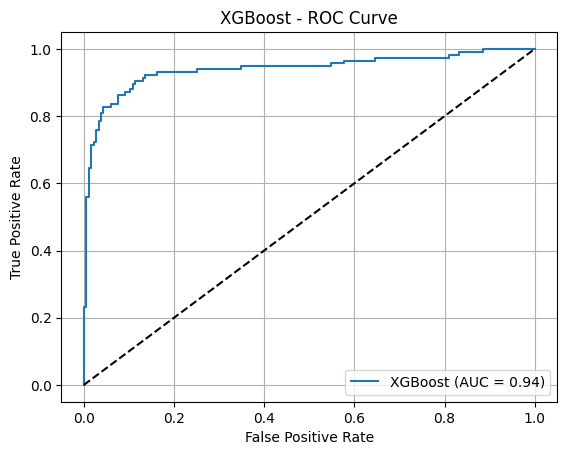

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    f1_score
)

models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [28]:
# Translating predicted probabilities into categories
def risk_category(prob):
    if prob < 0.3: return 'Low'
    elif prob < 0.7: return 'Medium'
    else: return 'High'

# Example for XGBoost
probs = xgb_model.predict_proba(X_test)[:, 1]
risk_labels = [risk_category(p) for p in probs]

# Show prediction and risk categories
df_results = X_test.copy()
df_results['Actual'] = y_test.values
df_results['Predicted_Prob'] = probs
df_results['Risk_Category'] = risk_labels

print(df_results[['Predicted_Prob', 'Risk_Category']].head())

df_results.to_csv('cancer_risk_predictions.csv', index=False)

# Save model and scaler

joblib.dump(xgb_model, 'cancer_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(bmi_encoder, 'bmi_encoder.pkl')

joblib.dump(age_group_encoder, 'age_group_encoder.pkl')

      Predicted_Prob Risk_Category
1116        0.967735          High
1368        0.989449          High
422         0.026293           Low
413         0.001051           Low
451         0.009092           Low


['age_group_encoder.pkl']